In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/supermarket_churnData.csv')
df.head()

row_number   invoice_id branch  customer_id  gender  age customer_type  \
0           1  655-07-2265      A     15681196    Male   35        Normal   
1           2  689-05-1884      A     15809006    Male   23        Member   
2           3  883-17-4236      C     15749947  Female   44        Normal   
3           4  453-33-6436      A     15655590    Male   46        Normal   
4           5  250-17-5703      A     15624975    Male   28        Member   

   credit_score  has_creditcard  is_active_member        product_category  \
0           629               1                 1  Electronic accessories   
1           602               0                 0       Health and beauty   
2           665               1                 1       Sports and travel   
3           581               0                 0      Home and lifestyle   
4           693               0                 1      Food and beverages   

   number_of_products  tax_amount  price  total_amount  ratings  \
0                   3     11.7465  78.31      246.6765      5.4   
1                  10     24.3150  48.63      510.6150      8.8   
2                   2      1.4390  14.39       30.2190      7.2   
3                   8     37.2480  93.12      782.2080      6.8   
4                  10      9.4250  18.85      197.9250      5.6   

   customer_churn  
0               0  
1               0  
2               0  
3               0  
4               0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   row_number          10000 non-null  int64  
 1   invoice_id          10000 non-null  object 
 2   branch              10000 non-null  object 
 3   customer_id         10000 non-null  int64  
 4   gender              10000 non-null  object 
 5   age                 10000 non-null  int64  
 6   customer_type       10000 non-null  object 
 7   credit_score        10000 non-null  int64  
 8   has_creditcard      10000 non-null  int64  
 9   is_active_member    10000 non-null  int64  
 10  product_category    10000 non-null  object 
 11  number_of_products  10000 non-null  int64  
 12  tax_amount          10000 non-null  float64
 13  price               10000 non-null  float64
 14  total_amount        10000 non-null  float64
 15  ratings             10000 non-null  float64
 16  custo

In [ ]:
df["customer_churn"].value_counts()


0    7963
1    2037
Name: customer_churn, dtype: int64

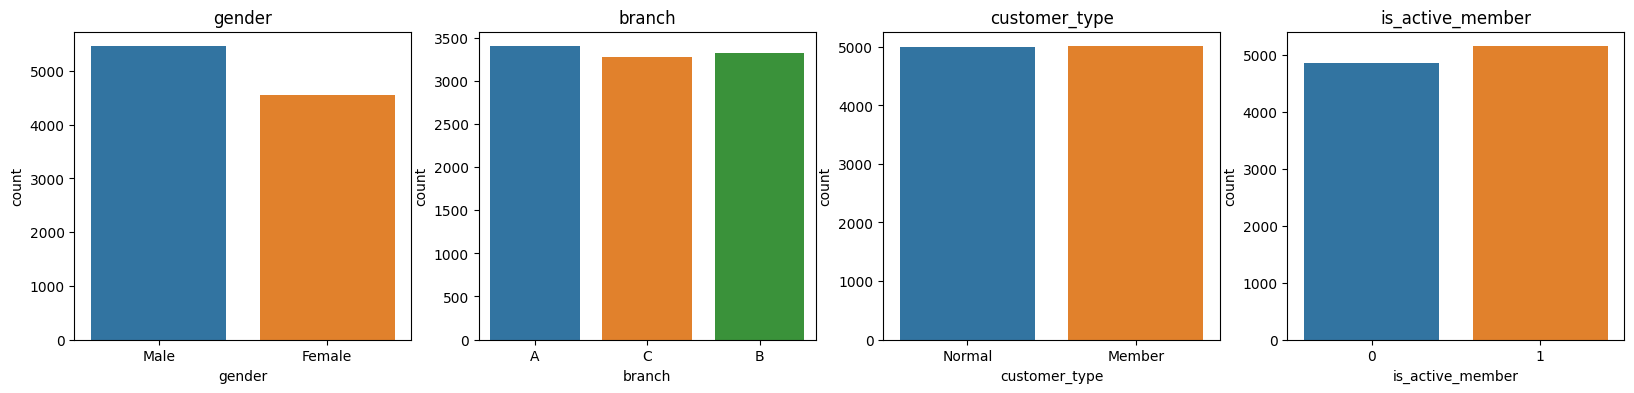

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['gender','branch',"customer_type","is_active_member"]
numerical = cols
plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df)
    ax.set_title(f"{col}")


<Axes: xlabel='age', ylabel='Count'>

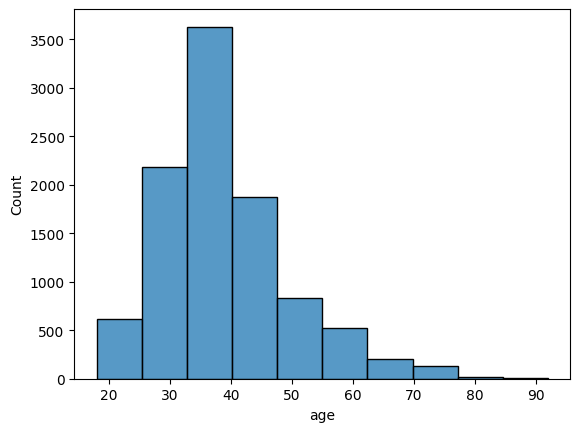

In [ ]:
sns.histplot(data=df, x='age',bins=10)

<Axes: xlabel='credit_score', ylabel='Count'>

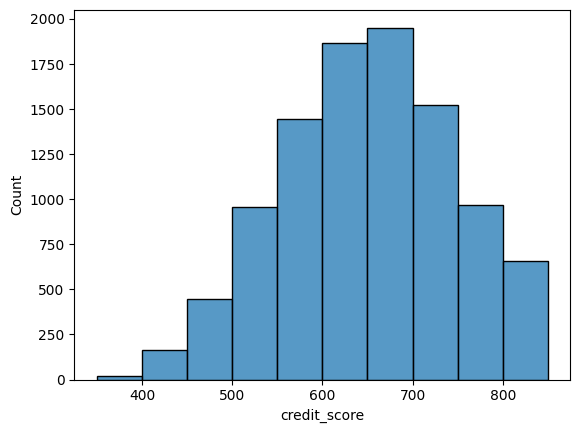

In [ ]:
sns.histplot(data=df, x='credit_score',bins=10)

<Axes: xlabel='number_of_products', ylabel='Count'>

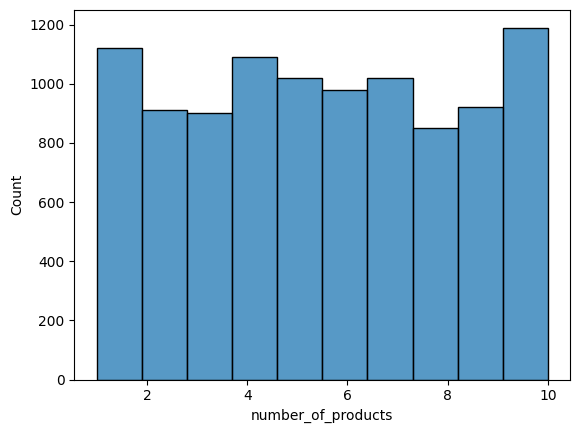

In [ ]:
sns.histplot(data=df, x='number_of_products',bins=10)

<Axes: xlabel='total_amount', ylabel='Count'>

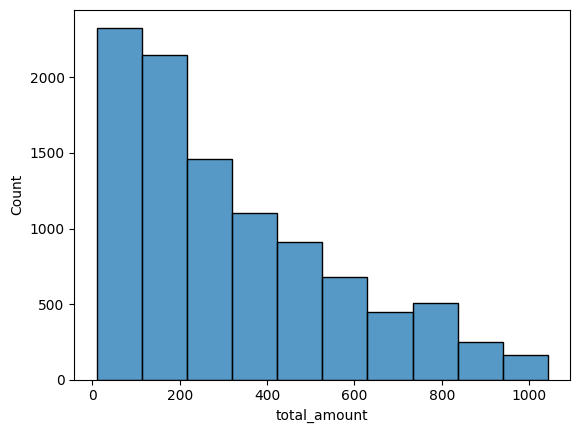

In [ ]:
sns.histplot(data=df, x='total_amount',bins=10)

<Axes: xlabel='price', ylabel='Count'>

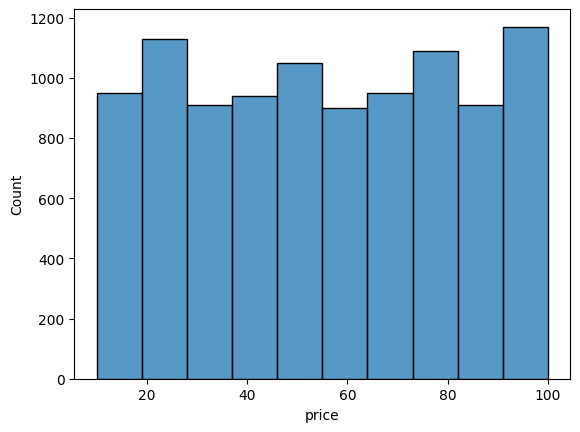

In [ ]:
sns.histplot(data=df, x='price',bins=10)

<Axes: xlabel='ratings', ylabel='Count'>

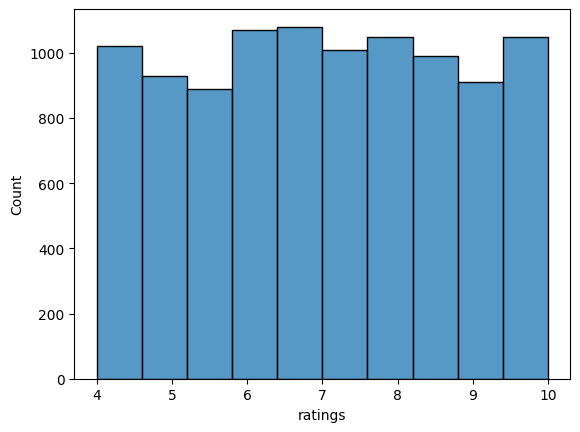

In [ ]:
sns.histplot(data=df, x='ratings',bins=10)

<Axes: xlabel='customer_churn', ylabel='age'>

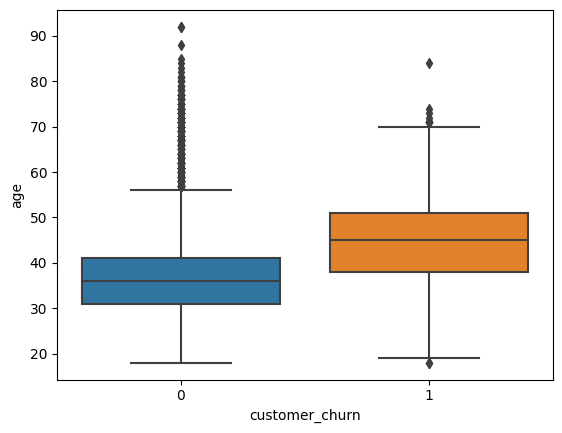

In [ ]:
sns.boxplot(x='customer_churn', y='age', data=df)

<Axes: xlabel='customer_churn', ylabel='number_of_products'>

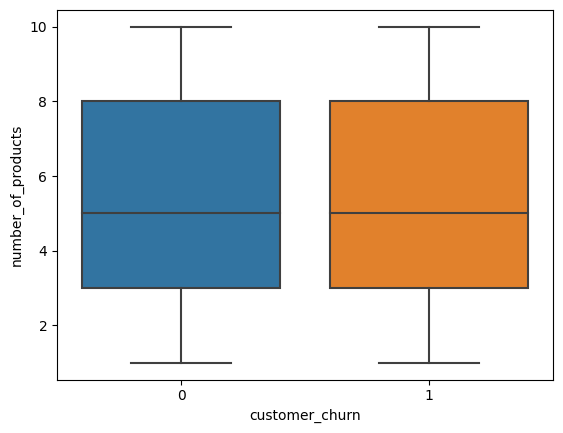

In [ ]:
sns.boxplot(x='customer_churn', y='number_of_products', data=df)

<Axes: xlabel='customer_churn', ylabel='price'>

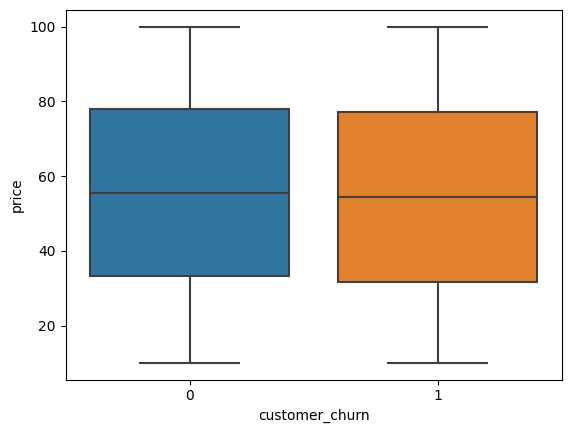

In [ ]:
sns.boxplot(x='customer_churn', y='price', data=df)

<Axes: xlabel='customer_churn', ylabel='ratings'>

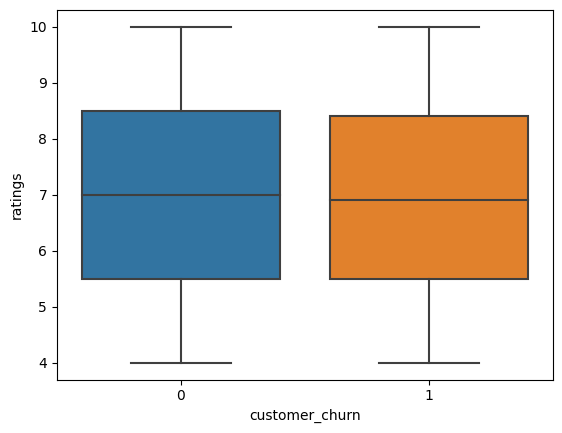

In [ ]:
sns.boxplot(x='customer_churn', y='ratings', data=df)

<Axes: xlabel='customer_churn', ylabel='total_amount'>

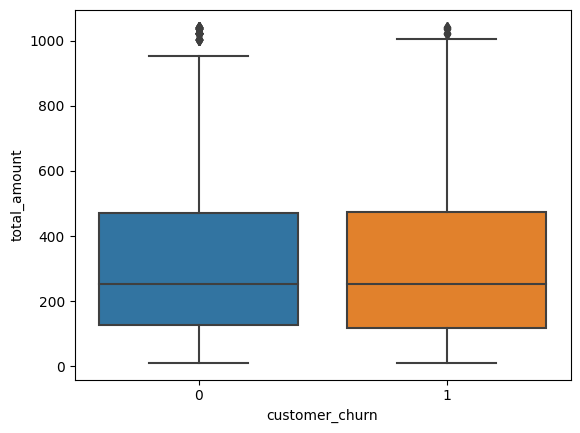

In [ ]:
sns.boxplot(x='customer_churn', y='total_amount', data=df)

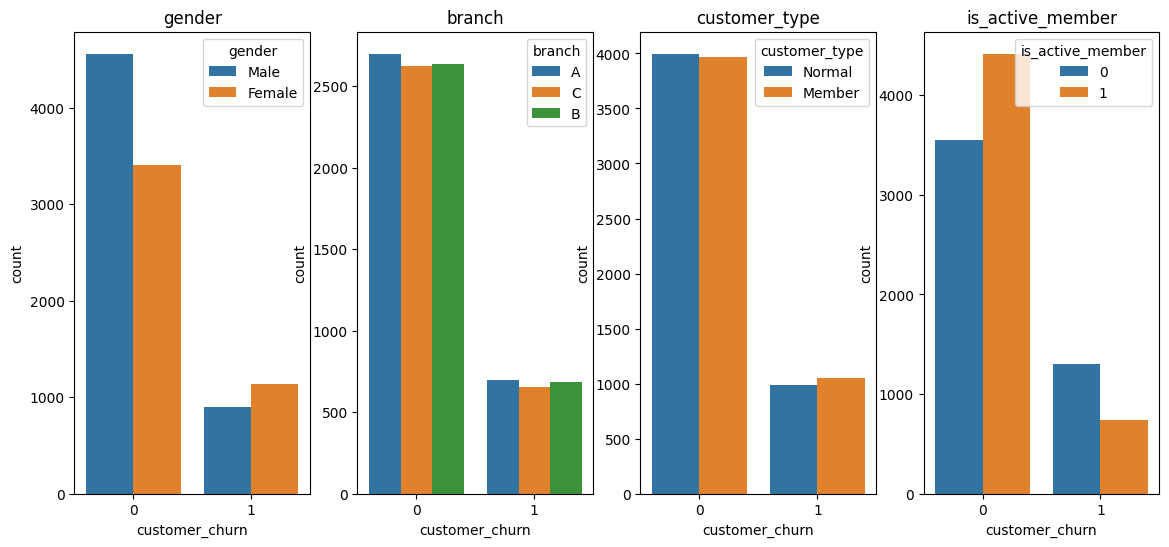

In [ ]:
cols = ['gender','branch',"customer_type","is_active_member"]

plt.figure(figsize=(14,6))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="customer_churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

In [ ]:
Num_col= ['age','tax_amount','price','total_amount','ratings','credit_score','number_of_products','customer_churn']

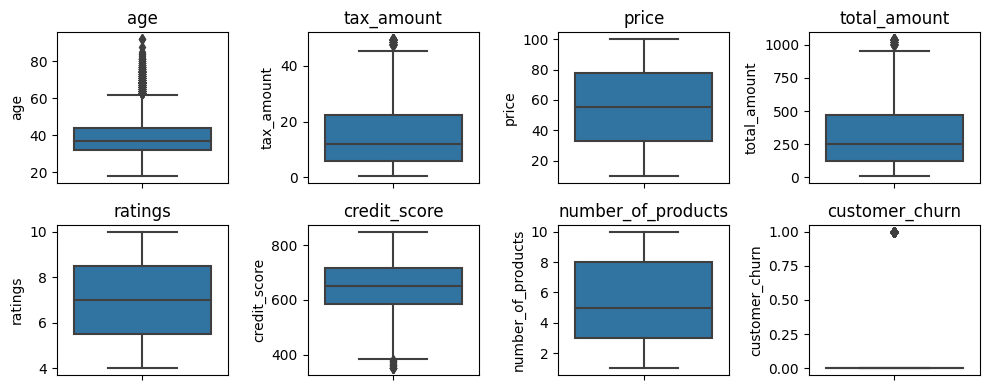

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(10, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each numeric column
for k in range(len(Num_col)):
    sns.boxplot(ax=axes[k], data=df, y=Num_col[k])
    axes[k].set_title(Num_col[k])

plt.tight_layout()
plt.show()

<Axes: xlabel='gender', ylabel='age'>

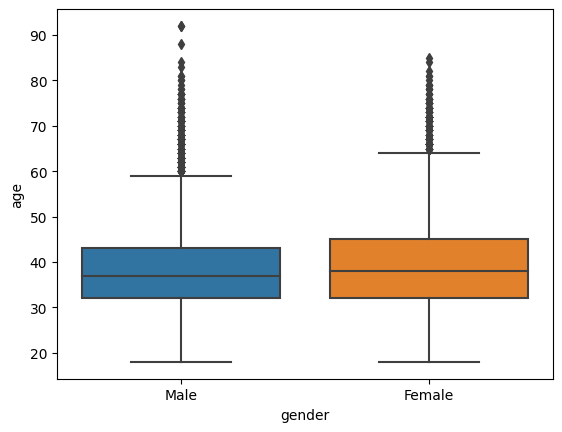

In [ ]:
sns.boxplot(x='gender', y='age', data=df)

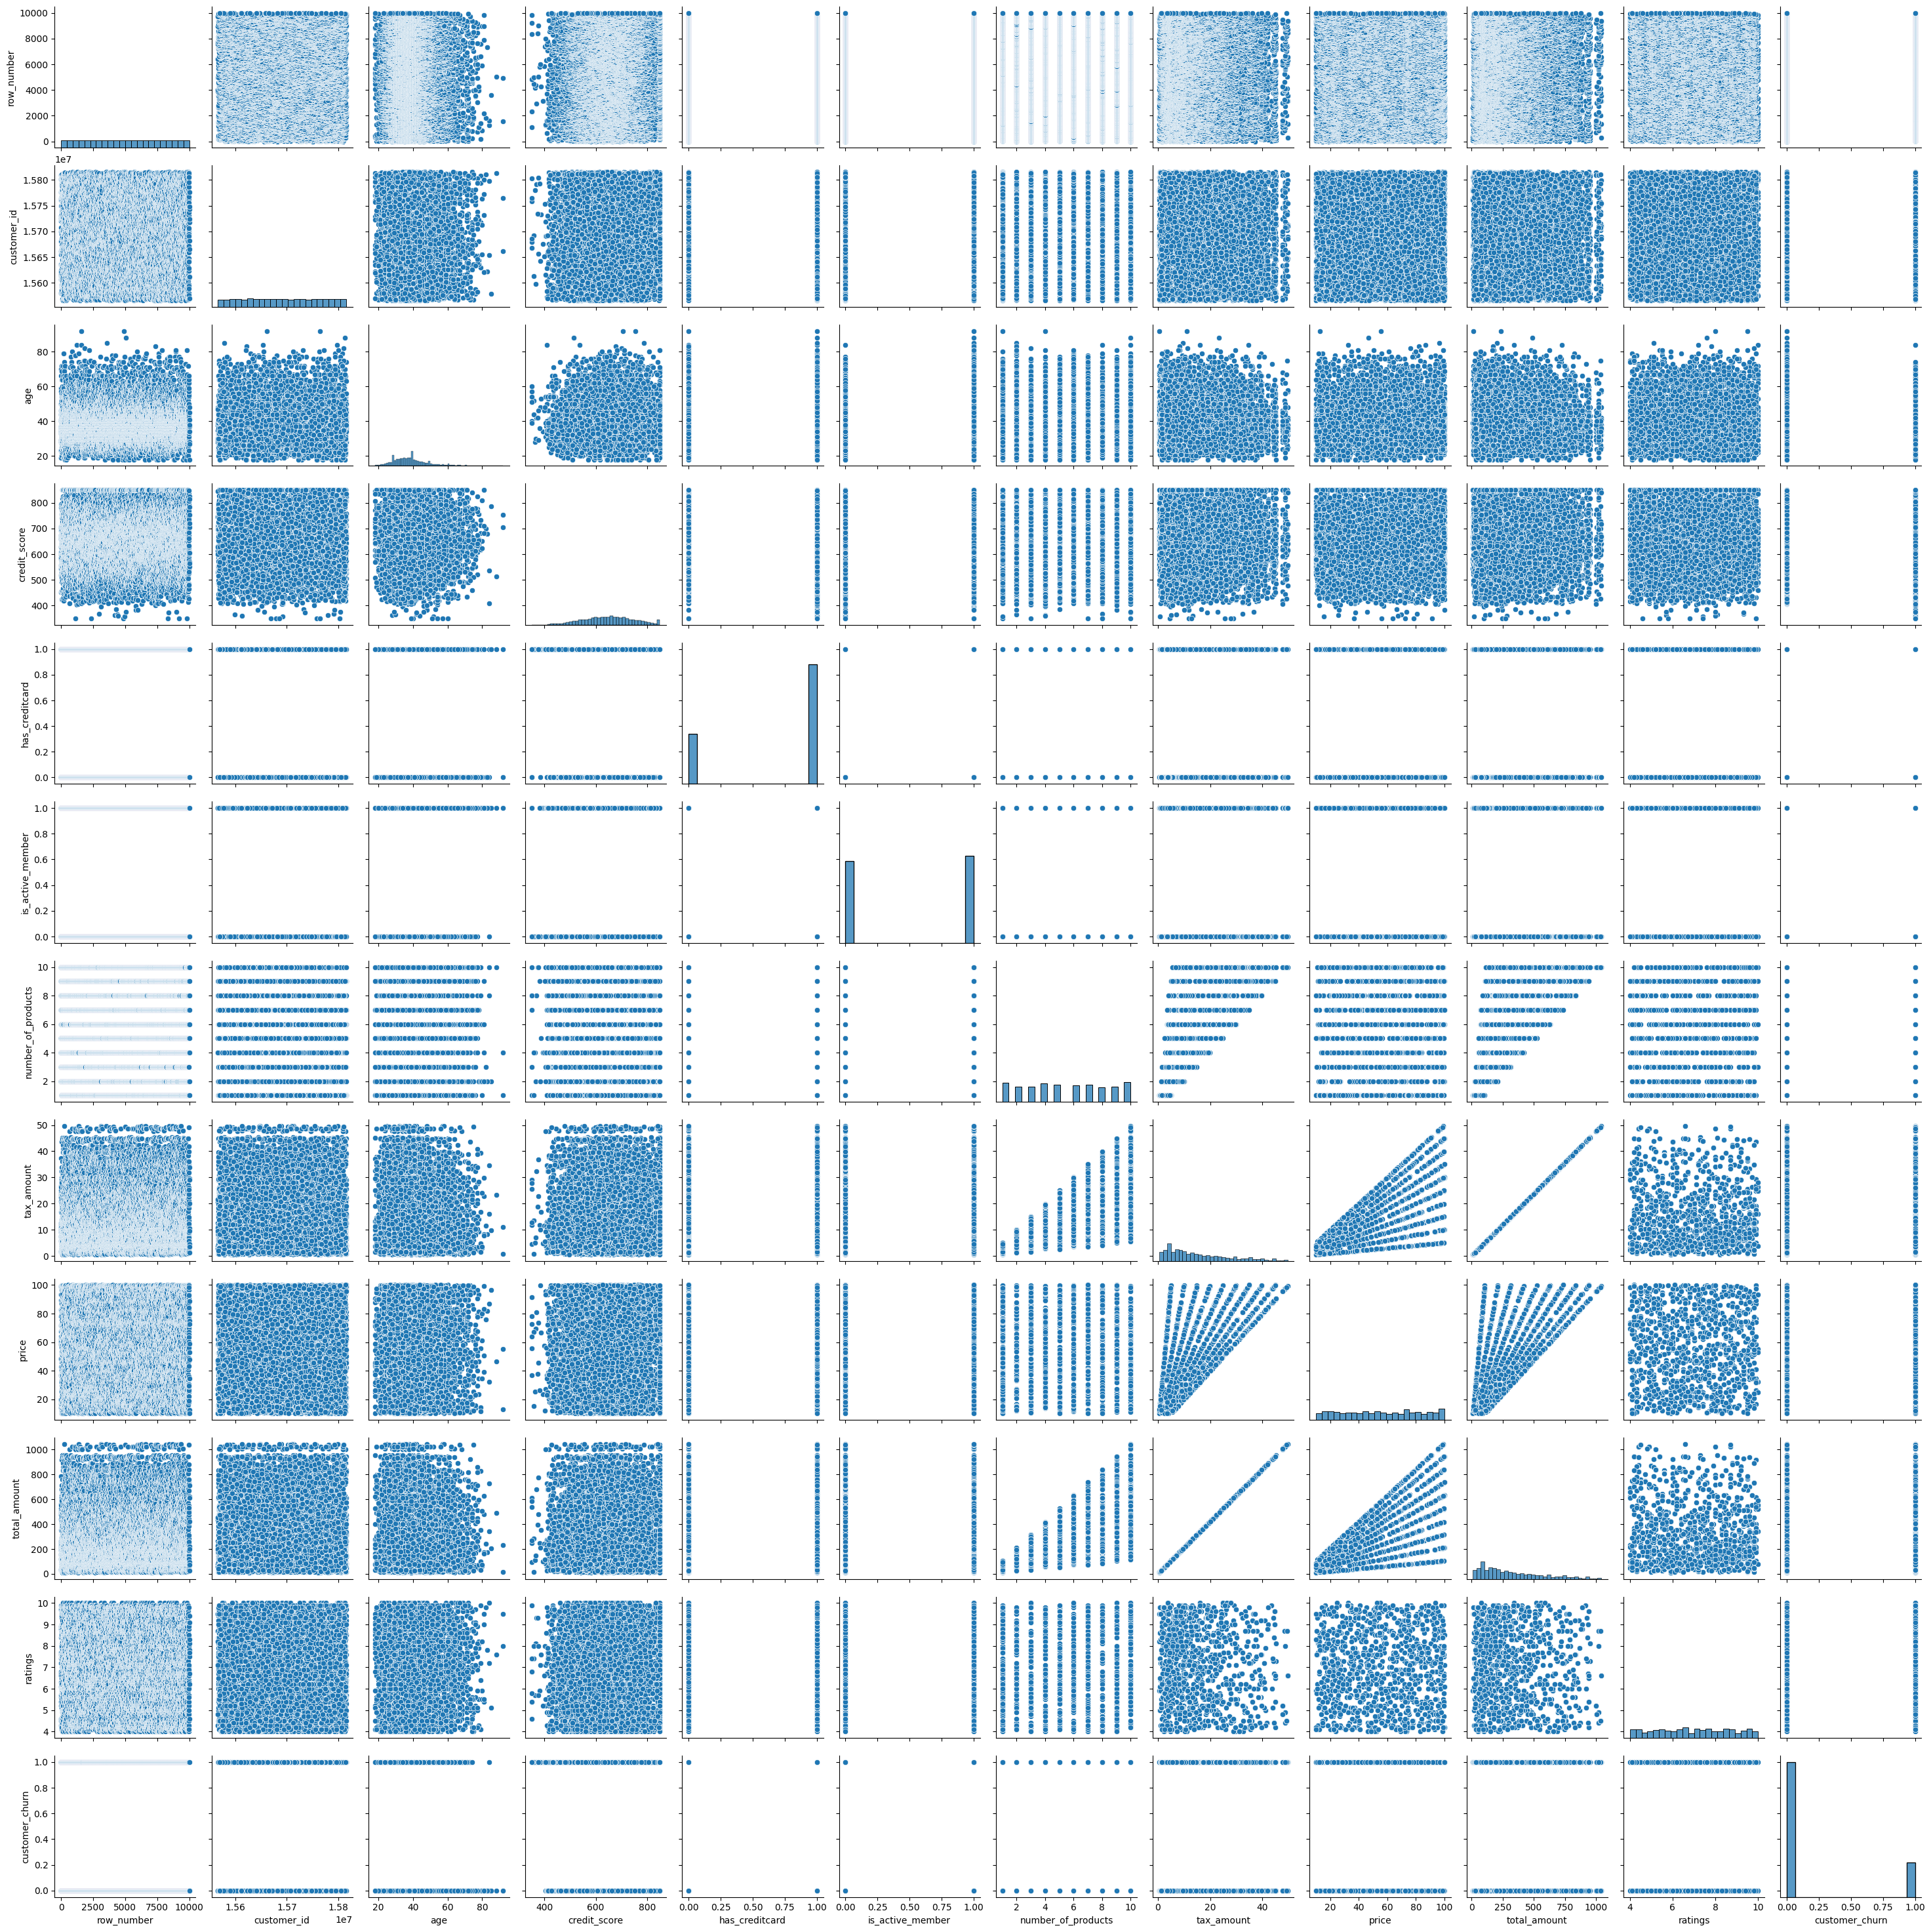

In [ ]:
sns.pairplot(df)

<ipython-input-13-22aec262472e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

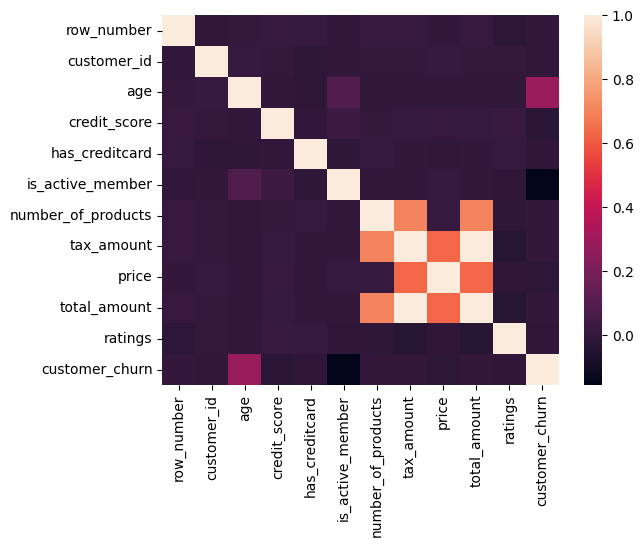

In [ ]:
correlation = df.corr()
sns.heatmap(correlation)

In [ ]:
correlation = df.corr()
correlation.style.background_gradient(cmap = 'BrBG')

<ipython-input-14-827587c19b8b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [ ]:
cat_features = df.drop(['row_number','invoice_id','customer_id','age','tax_amount','price','total_amount','ratings','credit_score','number_of_products','has_creditcard','is_active_member','customer_churn'],axis=1)

cat_features.head()


branch  gender customer_type        product_category
0      A    Male        Normal  Electronic accessories
1      A    Male        Member       Health and beauty
2      C  Female        Normal       Sports and travel
3      A    Male        Normal      Home and lifestyle
4      A    Male        Member      Food and beverages

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

branch  gender  customer_type  product_category
0       0       1              1                 0
1       0       1              0                 3
2       2       0              1                 5
3       0       1              1                 4
4       0       1              0                 2

In [ ]:
num_features = df[['row_number','invoice_id','customer_id','age','tax_amount','price','total_amount','ratings','credit_score','number_of_products','has_creditcard','is_active_member','customer_churn']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)
finaldf.head()

row_number   invoice_id  customer_id  age  tax_amount  price  total_amount  \
0           1  655-07-2265     15681196   35     11.7465  78.31      246.6765   
1           2  689-05-1884     15809006   23     24.3150  48.63      510.6150   
2           3  883-17-4236     15749947   44      1.4390  14.39       30.2190   
3           4  453-33-6436     15655590   46     37.2480  93.12      782.2080   
4           5  250-17-5703     15624975   28      9.4250  18.85      197.9250   

   ratings  credit_score  number_of_products  has_creditcard  \
0      5.4           629                   3               1   
1      8.8           602                  10               0   
2      7.2           665                   2               1   
3      6.8           581                   8               0   
4      5.6           693                  10               0   

   is_active_member  customer_churn  branch  gender  customer_type  \
0                 1               0       0       1              1   
1                 0               0       0       1              0   
2                 1               0       2       0              1   
3                 0               0       0       1              1   
4                 1               0       0       1              0   

   product_category  
0                 0  
1                 3  
2                 5  
3                 4  
4                 2

In [ ]:
finaldf['tax_amount'] = finaldf['tax_amount'].astype('int')
finaldf['price'] = finaldf['price'].astype('int')
finaldf['total_amount'] = finaldf['total_amount'].astype('int')
finaldf.head()

row_number   invoice_id  customer_id  age  tax_amount  price  total_amount  \
0           1  655-07-2265     15681196   35          11     78           246   
1           2  689-05-1884     15809006   23          24     48           510   
2           3  883-17-4236     15749947   44           1     14            30   
3           4  453-33-6436     15655590   46          37     93           782   
4           5  250-17-5703     15624975   28           9     18           197   

   ratings  credit_score  number_of_products  has_creditcard  \
0      5.4           629                   3               1   
1      8.8           602                  10               0   
2      7.2           665                   2               1   
3      6.8           581                   8               0   
4      5.6           693                  10               0   

   is_active_member  customer_churn  branch  gender  customer_type  \
0                 1               0       0       1              1   
1                 0               0       0       1              0   
2                 1               0       2       0              1   
3                 0               0       0       1              1   
4                 1               0       0       1              0   

   product_category  
0                 0  
1                 3  
2                 5  
3                 4  
4                 2

In [ ]:
from sklearn.model_selection import train_test_split

finaldf = finaldf.dropna()
finaldf = finaldf.drop(['customer_id'],axis=1)
finaldf = finaldf.drop(['invoice_id'],axis=1)
finaldf = finaldf.drop(['row_number'],axis=1)
X = finaldf.drop(['customer_churn'],axis=1)
y = finaldf['customer_churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [ ]:
y_train.value_counts()

1    5342
0    5342
Name: customer_churn, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
clf= DecisionTreeClassifier()

In [ ]:
param_grid ={'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [ ]:
clf_cv = GridSearchCV(clf, param_grid, cv=5)

In [ ]:
clf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
clf_model =clf_cv.best_estimator_
print('The best hyperparameters are: ', clf_cv.best_params_)
print('The best score is ', clf_cv.best_score_)

The best hyperparameters are:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
The best score is  0.7751795544525824


In [ ]:
importance =clf_model.feature_importances_

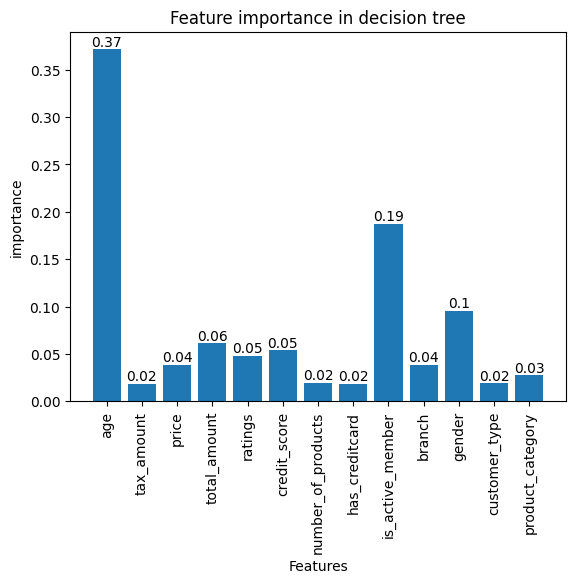

In [ ]:
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)),list(X.columns), rotation=90)
for x, y in enumerate(importance):
    plt.text(x,y,str(round(y,2)), ha='center', va='bottom')
plt.xlabel('Features')
plt.ylabel('importance')
plt.title('Feature importance in decision tree')
plt.show()

In [ ]:
print('The accuracy of decision tree  is ',clf_model.score(X_test, y_test))

The accuracy of decision tree  is  0.7342424242424243


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [ ]:
from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print('The accuracy of Random Forest is', (accuracy_score(preds,y_test)))

The accuracy of Random Forest is 0.776969696969697


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, preds)

array([[2275,  346],
       [ 390,  289]])

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2621
           1       0.46      0.43      0.44       679

    accuracy                           0.78      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.77      0.78      0.77      3300

